In [1]:
import warnings
warnings.filterwarnings('ignore')

SEED = 42
SAMPLE_RATE = 2000 # Hz
SKIP_SECONDS = 5 # sec
TIME_LENGTH = 6 # sec
OVERLAP_SECONDS = 2 # sec
# SCALING = True
SCALING = False
# TYPE_ANOMALY_DETECTION = "Novelty"
TYPE_ANOMALY_DETECTION = "Outlier"
# TYPE_DOMAIN = "freq"
TYPE_DOMAIN = "time"

In [2]:
# load X_data_{TYPE_DOMAIN}.npy and y_data_{TYPE_DOMAIN}.npy
import numpy as np

# load data
data = np.load(f'X_data_encode_{TYPE_DOMAIN}.npy')
labels = np.load(f'y_data_{TYPE_DOMAIN}.npy')

In [3]:
good_indices = [index for index, value in enumerate(labels) if value == 0]
bad_indices = [index for index, value in enumerate(labels) if value == 1]

In [4]:
data.shape, labels.shape

((83340, 227), (83340,))

In [5]:
# # 標準化數據
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# scaler = StandardScaler()
# data_normalized = scaler.fit_transform(data)
# data_normalized = data

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(vibration_data, color='b'):
    freq = 2000
    samples_s = len(vibration_data) / freq
    samples = np.linspace(0, samples_s, len(vibration_data))

    # plotting
    plt.figure(figsize=(20, 2))
    plt.plot(samples, vibration_data, color)
    plt.ylabel('Z-axis Vibration Data')
    plt.xlabel('Time [sec]')
    plt.locator_params(axis='y', nbins=10)
    plt.grid()
    plt.show()

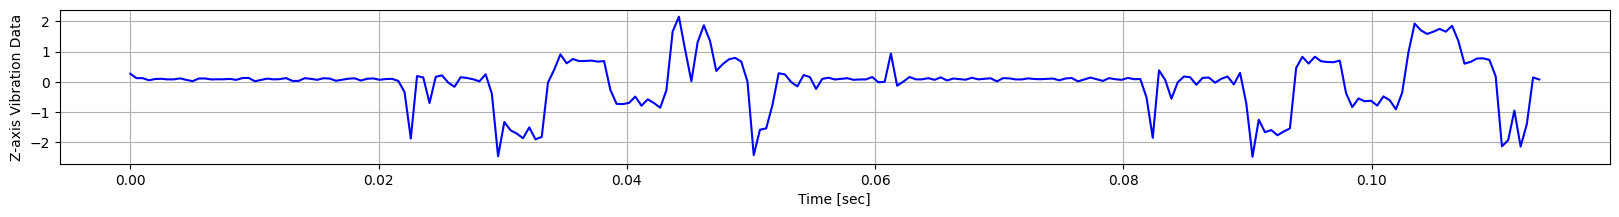

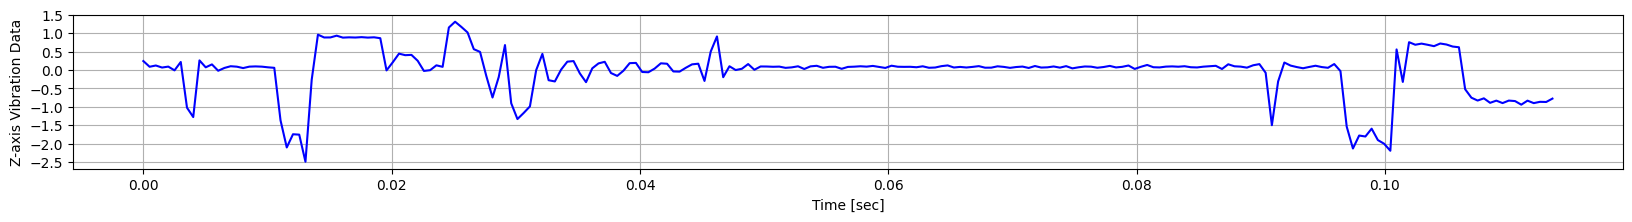

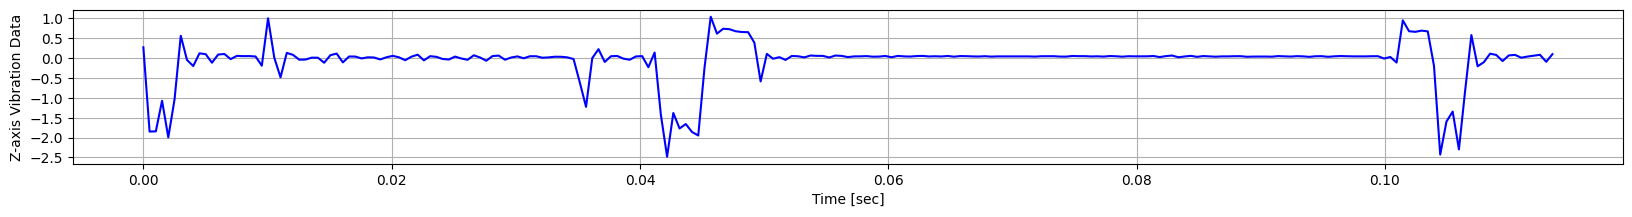

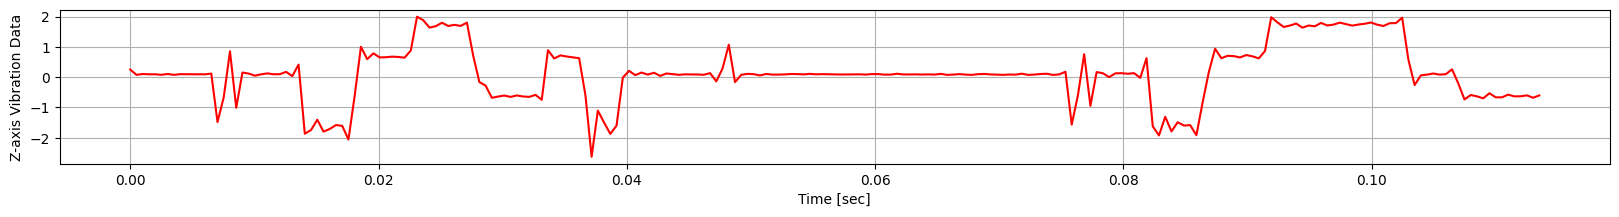

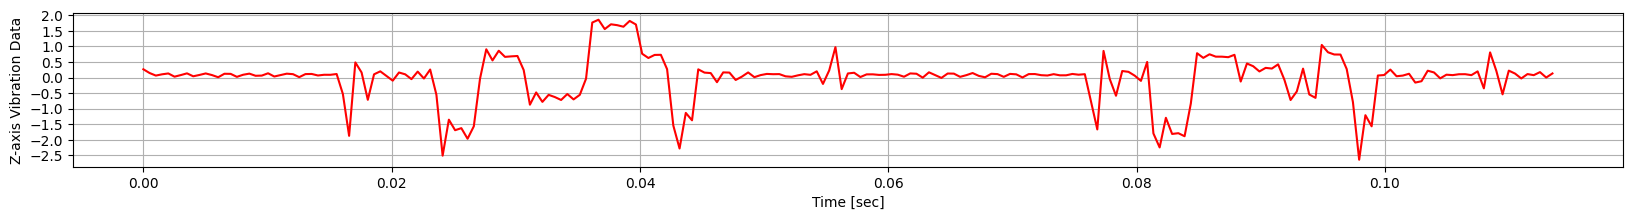

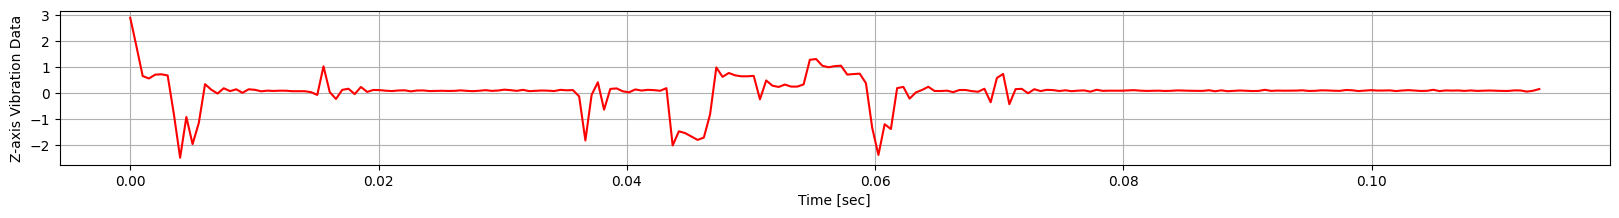

In [7]:
import random
# 隨機選取數據的索引
random_good_indices = random.sample(range(len(good_indices)), 3)
# 繪製圖片
for i, idx in enumerate(random_good_indices):
    plot_data(data[idx], color='b')
    
# 隨機選取數據的索引
random_bad_indices = random.sample(range(len(bad_indices)), 3)
# 繪製圖片
for i, idx in enumerate(random_bad_indices):
    plot_data(data[idx], color='r')

In [8]:
# import random
# # 隨機選取數據的索引
# random_good_indices = random.sample(range(len(good_indices)), 3)
# # 繪製圖片
# for i, idx in enumerate(random_good_indices):
#     plot_data(data_normalized[idx], color='b')
    
# # 隨機選取數據的索引
# random_bad_indices = random.sample(range(len(bad_indices)), 3)
# # 繪製圖片
# for i, idx in enumerate(random_bad_indices):
#     plot_data(data_normalized[idx], color='r')

In [9]:
# 設定顏色對應表（0~9）
label_colors = {
    0: 'blue',
    1: 'red',
}

In [10]:
# !pip install umap-learn

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, n_iter=300)
umap = UMAP(n_components=2, random_state=SEED)

data_pca = pca.fit_transform(data)
# data_normalized_pca = pca.fit_transform(data_normalized)
data_tsne = tsne.fit_transform(data)
# data_normalized_tsne = tsne.fit_transform(data_normalized)
data_umap = umap.fit_transform(data)
# data_normalized_umap = umap.fit_transform(data_normalized)

2025-01-21 09:19:40.573856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-21 09:19:41.454773: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:
2025-01-21 09:19:41.454907: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:
2025-01-21 09:19:41.454918: W tensorflow/compiler/tf2tensorrt/util

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_datas_in_2d(data_visualize, visualize_way):
    # 假設 data_visualize 是你的 visualize_way 結果，labels 是每個數據點的標籤
    print(f"data_visualize range: x({data_visualize[:, 0].min()}, {data_visualize[:, 0].max()}), y({data_visualize[:, 1].min()}, {data_visualize[:, 1].max()})")

    # 調整繪圖程式碼
    plt.figure(figsize=(12, 8))

    # 設置固定的顯示範圍
    x_min, x_max = data_visualize[:, 0].min() - 5, data_visualize[:, 0].max() + 5
    y_min, y_max = data_visualize[:, 1].min() - 5, data_visualize[:, 1].max() + 5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # for i in normal_indices:
    for i in range(len(data_visualize)):
        plt.text(
            data_visualize[i, 0], 
            data_visualize[i, 1], 
            str(labels[i]),  # 顯示標註的 label
            fontsize=8, 
            color=label_colors.get(labels[i], 'gray'),  # 如果沒有對應顏色就用灰色
            alpha=0.3  # 提高透明度
        )

    # 添加圖例
    for label, color in label_colors.items():
        plt.scatter([], [], color=color, label=f'Label {label}')  # 空白點對應顏色和標籤

    # 設置標題和顯示
    plt.title(f"{visualize_way} Visualization of CNC machining Data")
    plt.xlabel(f"{visualize_way} Component 1")
    plt.ylabel(f"{visualize_way} Component 2")
    plt.legend(title="Label Colors")  # 圖例的標題
    plt.show()

data_visualize range: x(-9.262748718261719, 9.805887222290039), y(-9.201949119567871, 8.353730201721191)


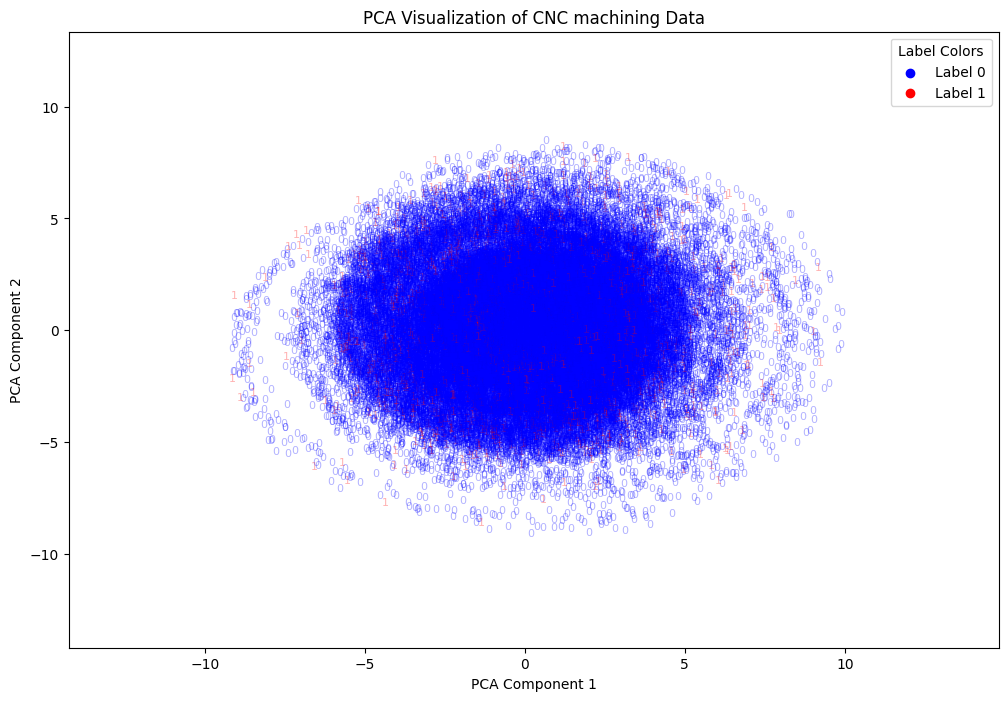

In [13]:
plot_datas_in_2d(data_pca, "PCA")

In [14]:
# plot_datas_in_2d(data_normalized_pca, "PCA")

data_visualize range: x(-12.184006690979004, 12.379454612731934), y(-12.33256721496582, 12.195204734802246)


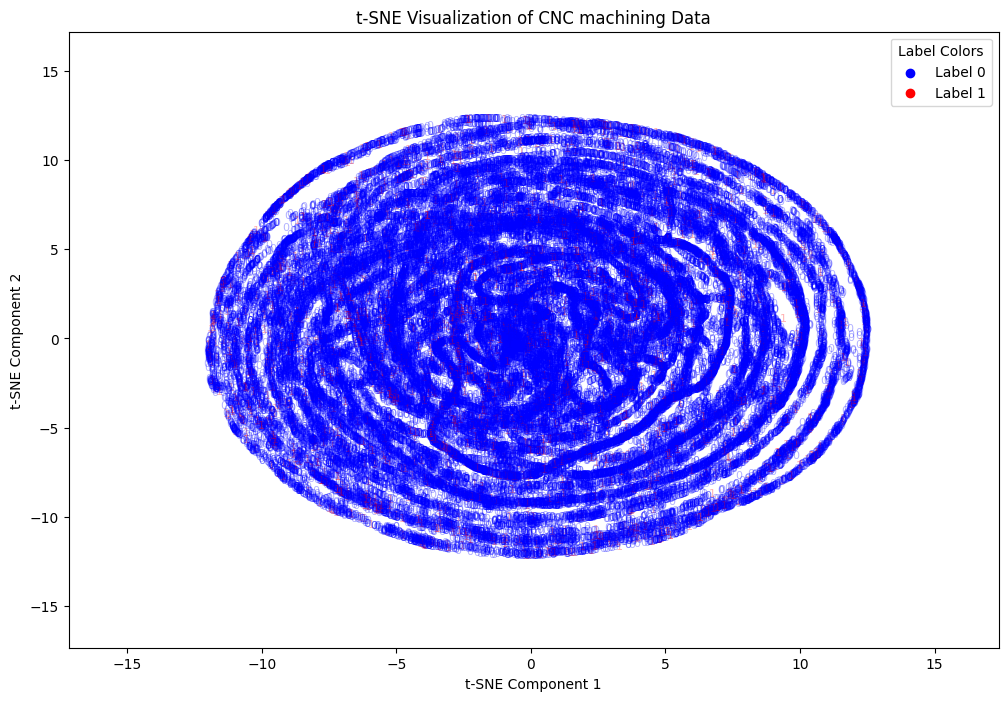

In [15]:
plot_datas_in_2d(data_tsne, "t-SNE")

In [16]:
# plot_datas_in_2d(data_normalized_tsne, "t-SNE")

data_visualize range: x(-2.4551632404327393, 19.667125701904297), y(-6.029028415679932, 16.407752990722656)


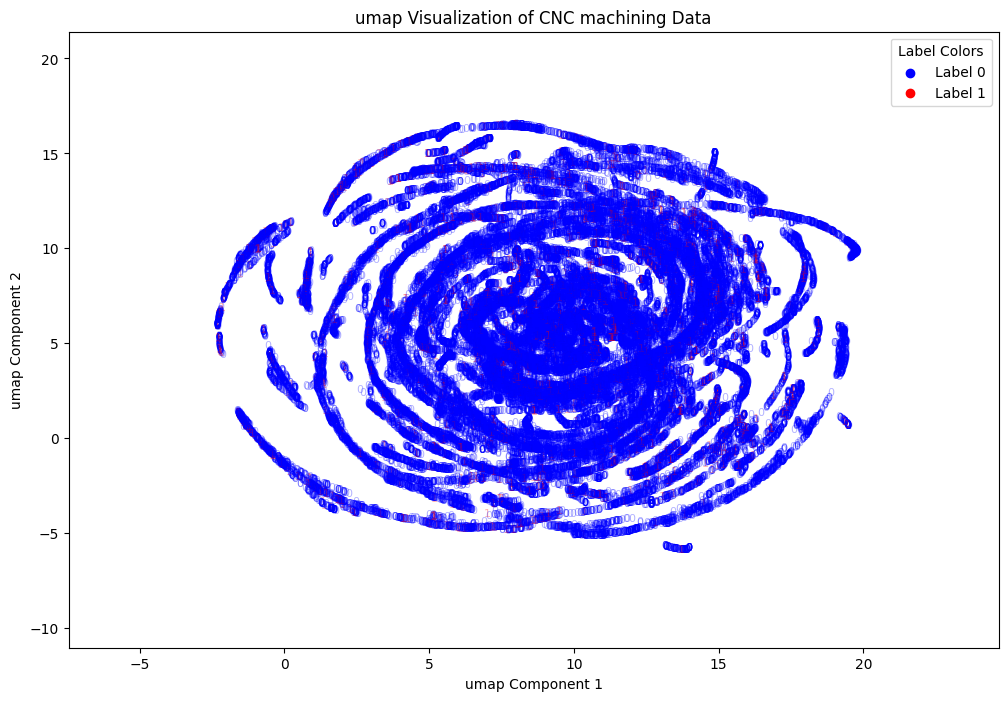

In [17]:
plot_datas_in_2d(data_umap, "umap")

In [18]:
# plot_datas_in_2d(data_normalized_umap, "umap")